# Data Exploration

In [15]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [18]:
df

,MONTH,ID,YEAR,N_MONTHS,POINT_BALANCE,aspect,slope,t2m,tp,slhf,sshf,ssrd,fal,srt
0,nov,0,2011,7,1170,1.583333,0.480018,258.679878,0.777108,4.189802e+04,-1.575253e+06,2.267411e+05,1.969174e+06,0.000630
1,dec,0,2011,7,1170,1.583333,0.480018,256.312215,0.766329,5.325177e+04,-9.148024e+05,2.997246e+05,6.531560e+05,0.001660
2,jan,0,2011,7,1170,1.583333,0.480018,261.251488,0.840147,9.842517e+04,-8.157780e+05,3.047292e+05,1.099648e+06,0.002478
3,feb,0,2011,7,1170,1.583333,0.480018,259.040377,0.818564,8.079063e+04,-1.604857e+06,3.013928e+05,4.251783e+06,0.001674
4,mar,0,2011,7,1170,1.583333,0.480018,262.333705,0.838411,5.397647e+04,-2.223413e+06,3.043121e+05,9.368643e+06,0.004430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,may,9,2015,12,570,1.583333,0.480018,270.434888,0.750710,-7.818523e+05,-3.530119e+06,-3.796476e+05,2.152948e+07,0.003272
94,jun,9,2015,12,570,1.583333,0.480018,274.663216,0.627172,-5.545358e+05,-2.577615e+06,-1.857200e+05,2.125608e+07,0.002843
95,jul,9,2015,12,570,1.583333,0.480018,278.971974,0.344747,-1.988731e+06,-1.995414e+06,-1.205821e+06,1.472331e+07,0.005484
96,aug,9,2015,12,570,1.583333,0.480018,280.510919,0.130010,-4.560474e+06,-5.350990e+06,-2.758076e+06,1.559041e+07,0.003396


In [16]:
gdf = gpd.read_file(filename='./example_data/norway/glacier_outlines/08_rgi60_Scandinavia.shp')
df = pd.read_csv('./example_data/norway/files/region_monthly.csv')
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['POINT_LON'], df['POINT_LAT'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

KeyError: 'POINT_LON'

NameError: name 'geo_df' is not defined

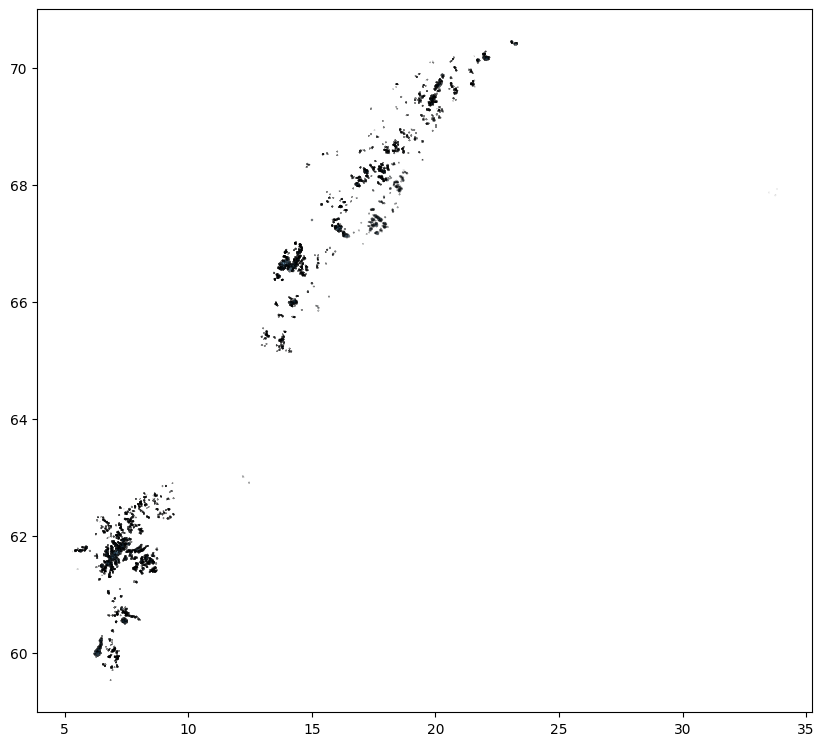

In [17]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
import contextily as cx
geo_df.plot(ax=ax)
cx.add_basemap(ax, zoom=19)